In [312]:
import numba
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib import colors
import time
from IPython import display

In [416]:
@njit
def cond_inic(populacao):
    N = len(populacao[0])
    a = np.random.randint(N)
    b = np.random.randint(N)
    populacao[a][b] = 1
    return populacao

In [417]:
@njit
def evolui_contaminacao(populacao,p_c):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                rnd = np.random.random()
                if populacao[i][(j+1)%N] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i+1)%N][j] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[i][(j-1)%N] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i-1)%N][j] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                                        
    return populacao_copia

In [418]:
@njit
def evolui_recontaminacao(populacao,p_rc):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 2:
                rnd = np.random.random()
                if populacao[i][(j+1)%N] == 1 and rnd <= p_rc:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i+1)%N][j] == 1 and rnd <= p_rc:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[i][(j-1)%N] == 1 and rnd <= p_rc:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i-1)%N][j] == 1 and rnd <= p_rc:
                    populacao_copia[i][j] = 1
                                        
    return populacao_copia

In [420]:
@njit
def evolui_recuperacao(populacao,p_r):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 1:
                rnd = np.random.random()
                if rnd <= p_r:
                    populacao_copia[i][j] = 2
                    
    return populacao_copia

In [421]:
@njit
def evolui_morte(populacao,p_m):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 1:
                rnd = np.random.random()
                if rnd <= p_m:
                    populacao_copia[i][j] = 3
                    
    return populacao_copia

In [411]:
def plota_quad(populacao):
    
    N = len(populacao[0])
    
    # create discrete colormap
    cmap = colors.ListedColormap(["teal","tomato","dimgrey","black"])
    bounds = [0,0.9,1.9,2.9,4]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(populacao, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, N, 1));
    ax.set_yticks(np.arange(-.5, N, 1));

    plt.show()

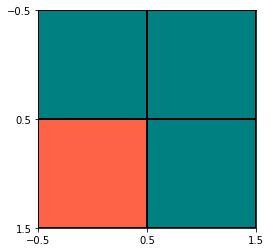

In [412]:
plota_quad([[0,0],[1,0]])

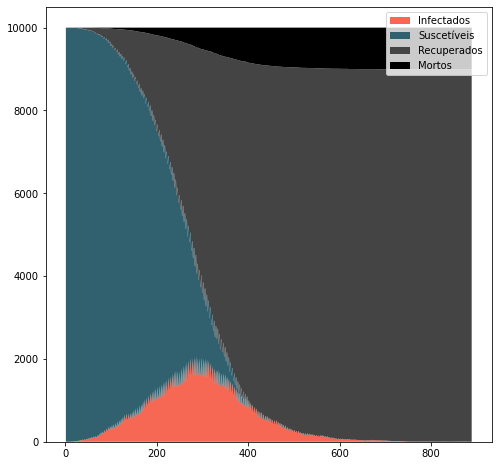

In [439]:
#Sistema
N = 100
populacao = np.zeros((N,N))
p_c = 0.8
p_r = 0.2
p_m = 0.01
p_rc = 0.08

suscetiveis = np.array([N*N-1])
infectados = np.array([1])
recuperados = np.array([0])
mortos = np.array([0])

populacao = cond_inic(populacao)

a = True
counter = 0

#Simulação
while a and counter <= 5000:
    counter += 1
    #Passo temporal no qual verificamos novas contaminações
    populacao = evolui_contaminacao(populacao,p_c)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    #Passo temporal no qual verificamos recuperações
    populacao = evolui_recuperacao(populacao,p_r)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    #Passo temporal no qual verificamos os possíveis mortos
    populacao = evolui_morte(populacao,p_m)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    #Passo temporal no qual verificamos reinfecções
    populacao = evolui_recontaminacao(populacao,p_rc)
    
    #Condição de parada, se ainda houver alguém doente, a simulação continua
    a = False
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1
                a = True 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)

plt.figure(figsize=(8,8))
plt.stackplot(np.linspace(1,len(suscetiveis),len(suscetiveis),endpoint=True),[infectados,suscetiveis,recuperados,mortos],labels=["Infectados","Suscetíveis","Recuperados","Mortos"],colors=["f66854","31606e","454445","black"])
plt.legend()
plt.show()

In [440]:
print(mortos[-1])

1009


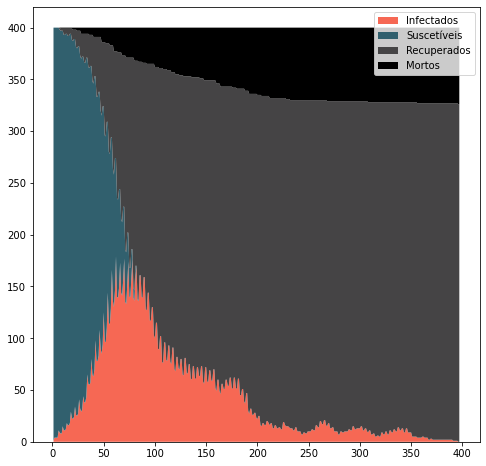

In [442]:
#Sistema
N = 20
populacao = np.zeros((N,N))
p_c = 0.8
p_r = 0.2
p_m = 0.02
p_rc = 0.08

suscetiveis = np.array([N*N-1])
infectados = np.array([1])
recuperados = np.array([0])
mortos = np.array([0])

populacao = cond_inic(populacao)

a = True

#Simulação
while a:
    #Passo temporal no qual verificamos novas contaminações
    populacao = evolui_contaminacao(populacao,p_c)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    plota_quad(populacao)
    display.clear_output(wait=True)
    
    #Passo temporal no qual verificamos recuperações
    populacao = evolui_recuperacao(populacao,p_r)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    plota_quad(populacao)
    display.clear_output(wait=True)
    
    #Passo temporal no qual verificamos os possíveis mortos
    populacao = evolui_morte(populacao,p_m)
    
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    plota_quad(populacao)
    display.clear_output(wait=True)
    
    #Passo temporal no qual verificamos reinfecções
    populacao = evolui_recontaminacao(populacao,p_rc)
    
    #Condição de parada, se ainda houver alguém doente, a simulação continua
    a = False
    sus = 0
    inf = 0
    rec = 0
    mor = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1
                a = True 
            elif populacao[i][j] == 2:
                rec += 1
            else:
                mor += 1
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    mortos = np.append(mortos,mor)
    
    plota_quad(populacao)
    display.clear_output(wait=True)

plt.figure(figsize=(8,8))
plt.stackplot(np.linspace(1,len(suscetiveis),len(suscetiveis),endpoint=True),[infectados,suscetiveis,recuperados,mortos],labels=["Infectados","Suscetíveis","Recuperados","Mortos"],colors=["f66854","31606e","454445","black"])
plt.legend()
plt.show()

COMO FAZER AS MÉDIAS??

In [444]:
mortos[-1]

74